In [29]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [30]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [31]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [32]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)

train_dataDataset = TensorDataset(train_data, train_labels)
test_dataDataset = TensorDataset(test_data, test_labels)

In [33]:
def createTheModel():
  ANN = nn.Sequential(
      nn.Linear(4,64),   
      nn.ReLU(),         
      nn.Linear(64,64),  
      nn.ReLU(),         
      nn.Linear(64,3),   
        )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANN.parameters(),lr=.001)

  return ANN,lossfun,optimizer

In [34]:
numEpochs = 500

def trainTheModel():
    trainAcc = []
    testAcc  = []
    losses   = []

    for epochi in range(numEpochs):
      ANN.train()

      batchAcc  = []
      batchLoss = []
      for X,y in train_loader:
        yHat = ANN(X)
        loss = lossfun(yHat,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
        batchLoss.append( loss.item() )

      trainAcc.append( np.mean(batchAcc) )
      losses.append( np.mean(batchLoss) )

      X,y = next(iter(test_loader))

      ANN.eval()
      with torch.no_grad():
        predlabels = torch.argmax( ANN(X),axis=1 )

      # compute accuracy
      testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
    
    # function output
    return trainAcc,testAcc,losses

In [35]:
batchSizes = 2**np.arange(1,7)

accuracyResultsTrain = np.zeros((numEpochs,len(batchSizes)))
accuracyResultsTest  = np.zeros((numEpochs,len(batchSizes)))

test_loader = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])

for bi in range(len(batchSizes)):
    train_loader = DataLoader(train_dataDataset,
                            batch_size=int(batchSizes[bi]), shuffle=True, drop_last=True)

    ANN,lossfun,optimizer = createTheModel()
    trainAcc,testAcc,losses = trainTheModel()
    
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi]  = testAcc

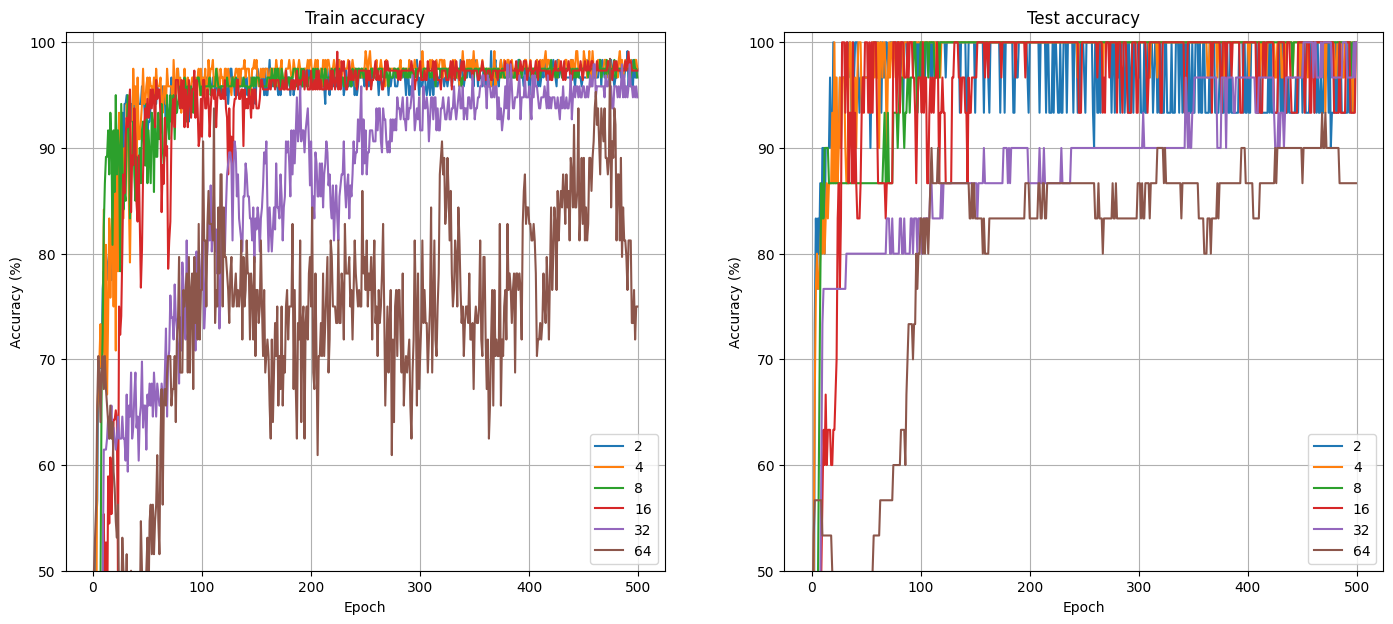

In [36]:
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
  ax[i].legend(batchSizes)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()